In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [145]:
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [148]:
df = df.drop(['Poster_Link','Series_Title','Released_Year','Runtime','Overview','Director','Star1','Star2','Star3','Star4'], axis=1)

In [149]:
df

,Certificate,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,A,Drama,9.3,80.0,2343110,"28,341,469"
1,A,"Crime, Drama",9.2,100.0,1620367,"134,966,411"
2,UA,"Action, Crime, Drama",9.0,84.0,2303232,"534,858,444"
3,A,"Crime, Drama",9.0,90.0,1129952,"57,300,000"
4,U,"Crime, Drama",9.0,96.0,689845,"4,360,000"
...,...,...,...,...,...,...
995,A,"Comedy, Drama, Romance",7.6,76.0,166544,NaN
996,G,"Drama, Western",7.6,84.0,34075,NaN
997,Passed,"Drama, Romance, War",7.6,85.0,43374,"30,500,000"
998,NaN,"Drama, War",7.6,78.0,26471,NaN


In [150]:
from sklearn.preprocessing import LabelEncoder

genre_encoder = LabelEncoder()
certificate_encoder = LabelEncoder()

df['Genre'] = genre_encoder.fit_transform(df['Genre'])
df['Certificate'] = certificate_encoder.fit_transform(df['Certificate'])

print(df.head())


   Certificate  Genre  IMDB_Rating  Meta_score  No_of_Votes        Gross
0            1    137          9.3        80.0      2343110   28,341,469
1            1    122          9.2       100.0      1620367  134,966,411
2           14     22          9.0        84.0      2303232  534,858,444
3            1    122          9.0        90.0      1129952   57,300,000
4           12    122          9.0        96.0       689845    4,360,000


In [151]:
df.isna().sum()

Certificate      0
Genre            0
IMDB_Rating      0
Meta_score     157
No_of_Votes      0
Gross          169
dtype: int64

In [152]:
df = df.dropna()

In [153]:
df.head()

,Certificate,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1,137,9.3,80.0,2343110,"28,341,469"
1,1,122,9.2,100.0,1620367,"134,966,411"
2,14,22,9.0,84.0,2303232,"534,858,444"
3,1,122,9.0,90.0,1129952,"57,300,000"
4,12,122,9.0,96.0,689845,"4,360,000"


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 997
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Certificate  750 non-null    int64  
 1   Genre        750 non-null    int64  
 2   IMDB_Rating  750 non-null    float64
 3   Meta_score   750 non-null    float64
 4   No_of_Votes  750 non-null    int64  
 5   Gross        750 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 41.0+ KB


In [155]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype(int)

/tmp/ipykernel_42/3016746087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].str.replace(',', '')
/tmp/ipykernel_42/3016746087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].astype(int)


In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Meta_score','No_of_Votes','Gross']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df.head())


   Certificate  Genre  IMDB_Rating  Meta_score  No_of_Votes     Gross
0            1    137          9.3    0.722222     1.000000  0.030257
1            1    122          9.2    1.000000     0.688192  0.144092
2           14     22          9.0    0.777778     0.982796  0.571025
3            1    122          9.0    0.861111     0.476616  0.061173
4           12    122          9.0    0.944444     0.286744  0.004653


/tmp/ipykernel_42/1240725280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [157]:
X = df.drop('IMDB_Rating',axis=1)
y = df['IMDB_Rating']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
    y,
    test_size = 0.25,
    train_size=0.75,
    random_state = 42
)

In [158]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import tensorflow as tf

In [159]:
model = tf.keras.Sequential()

In [160]:
model.add(Dense(5, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [161]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 5)                 30        
                                                                 
 dense_34 (Dense)            (None, 10)                60        
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [162]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [163]:
history = model.fit(X_train,
          y_train,
          epochs=500,
          verbose=0)

Epoch 1/500
18/18 - 1s - loss: 632.5376 - accuracy: 0.0000e+00 - 1s/epoch - 76ms/step
Epoch 2/500
18/18 - 0s - loss: 329.3918 - accuracy: 0.0000e+00 - 39ms/epoch - 2ms/step
Epoch 3/500
18/18 - 0s - loss: 153.6971 - accuracy: 0.0000e+00 - 38ms/epoch - 2ms/step
Epoch 4/500
18/18 - 0s - loss: 65.1400 - accuracy: 0.0000e+00 - 38ms/epoch - 2ms/step
Epoch 5/500
18/18 - 0s - loss: 28.8095 - accuracy: 0.0000e+00 - 38ms/epoch - 2ms/step
Epoch 6/500
18/18 - 0s - loss: 16.5800 - accuracy: 0.0000e+00 - 35ms/epoch - 2ms/step
Epoch 7/500
18/18 - 0s - loss: 13.8289 - accuracy: 0.0000e+00 - 38ms/epoch - 2ms/step
Epoch 8/500
18/18 - 0s - loss: 13.2202 - accuracy: 0.0000e+00 - 35ms/epoch - 2ms/step
Epoch 9/500
18/18 - 0s - loss: 12.8433 - accuracy: 0.0000e+00 - 30ms/epoch - 2ms/step
Epoch 10/500
18/18 - 0s - loss: 12.2161 - accuracy: 0.0000e+00 - 33ms/epoch - 2ms/step
Epoch 11/500
18/18 - 0s - loss: 11.5715 - accuracy: 0.0000e+00 - 32ms/epoch - 2ms/step
Epoch 12/500
18/18 - 0s - loss: 10.9283 - accuracy

18/18 [==============================] - 0s 2ms/step


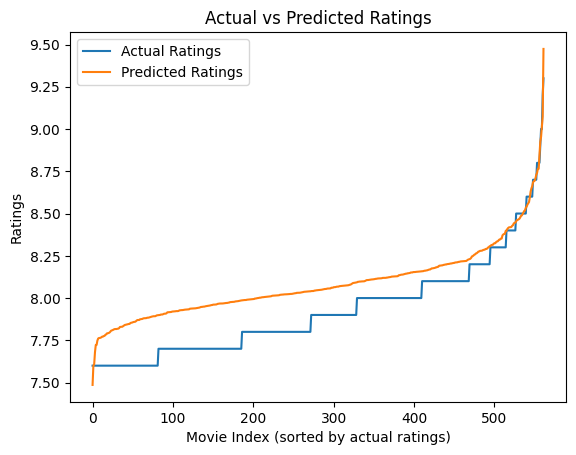

In [164]:

predictions = model.predict(X_train)
sorted_indices = np.argsort(y_train)

# Plotting actual and predicted ratings side by side
plt.plot(np.arange(len(y_train)), np.sort(y_train), label='Actual Ratings')
plt.plot(np.arange(len(predictions)), np.sort(predictions[:,0]), label='Predicted Ratings')
plt.xlabel('Movie Index (sorted by actual ratings)')
plt.ylabel('Ratings')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

6/6 [==============================] - 0s 2ms/step


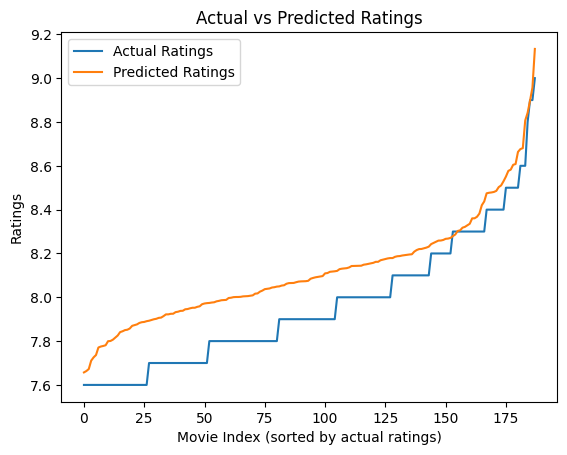

In [165]:
predictions = model.predict(X_test)
sorted_indices = np.argsort(y_test)

# Plotting actual and predicted ratings side by side
plt.plot(np.arange(len(y_test)), np.sort(y_test), label='Actual Ratings')
plt.plot(np.arange(len(predictions)), np.sort(predictions[:,0]), label='Predicted Ratings')
plt.xlabel('Movie Index (sorted by actual ratings)')
plt.ylabel('Ratings')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

In [166]:
model = tf.keras.Sequential()
model.add(Dense(4, activation='linear', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='softplus'))

In [167]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [168]:
history = model.fit(X_train,
          y_train,
          epochs=500,
          verbose=0)

18/18 [==============================] - 0s 2ms/step


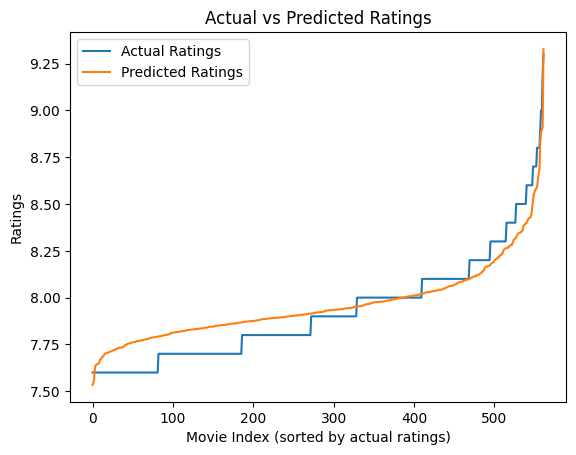

In [169]:
predictions = model.predict(X_train)
sorted_indices = np.argsort(y_train)

# Plotting actual and predicted ratings side by side
plt.plot(np.arange(len(y_train)), np.sort(y_train), label='Actual Ratings')
plt.plot(np.arange(len(predictions)), np.sort(predictions[:,0]), label='Predicted Ratings')
plt.xlabel('Movie Index (sorted by actual ratings)')
plt.ylabel('Ratings')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

6/6 [==============================] - 0s 2ms/step


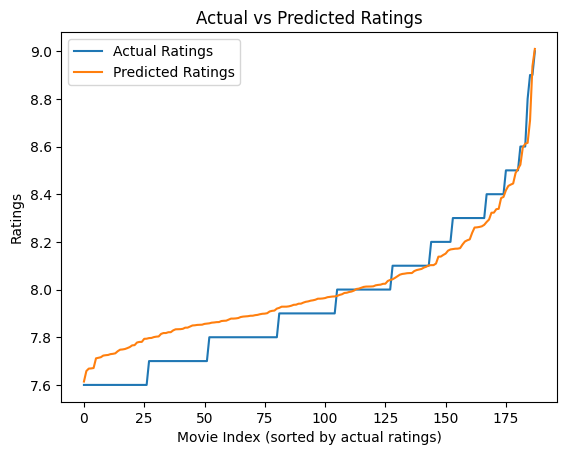

In [170]:
predictions = model.predict(X_test)
sorted_indices = np.argsort(y_test)

# Plotting actual and predicted ratings side by side
plt.plot(np.arange(len(y_test)), np.sort(y_test), label='Actual Ratings')
plt.plot(np.arange(len(predictions)), np.sort(predictions[:,0]), label='Predicted Ratings')
plt.xlabel('Movie Index (sorted by actual ratings)')
plt.ylabel('Ratings')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

In [171]:
new_df = df.drop('Gross',axis=1)

In [172]:
X = new_df.drop('IMDB_Rating',axis=1)
y = new_df['IMDB_Rating']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
    y,
    test_size = 0.25,
    train_size=0.75,
    random_state = 42
)

In [173]:
X_train

,Certificate,Genre,Meta_score,No_of_Votes
769,6,153,0.583333,0.001210
670,8,179,0.652778,0.068830
637,1,172,0.347222,0.213591
480,16,122,0.750000,0.007247
974,1,122,0.444444,0.144359
...,...,...,...,...
90,8,171,0.722222,0.053852
144,14,29,0.597222,0.177208
395,12,81,0.750000,0.118646
621,1,122,0.694444,0.235718


In [174]:
model = tf.keras.Sequential()
model.add(Dense(4, activation='linear', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='softplus'))

In [175]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [176]:
history = model.fit(X_train,
          y_train,
          epochs=500,
          verbose=0)

18/18 [==============================] - 0s 2ms/step


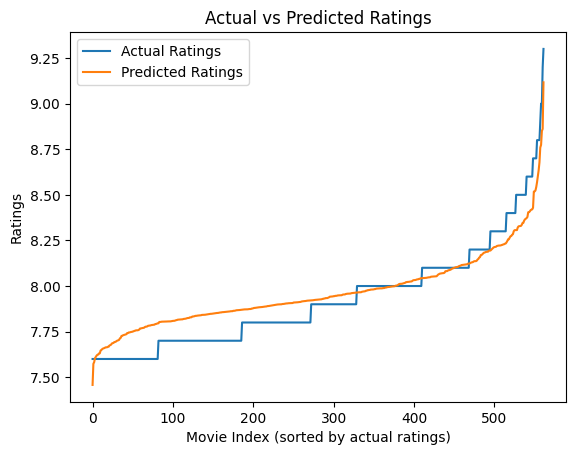

In [177]:
predictions = model.predict(X_train)
sorted_indices = np.argsort(y_train)

# Plotting actual and predicted ratings side by side
plt.plot(np.arange(len(y_train)), np.sort(y_train), label='Actual Ratings')
plt.plot(np.arange(len(predictions)), np.sort(predictions[:,0]), label='Predicted Ratings')
plt.xlabel('Movie Index (sorted by actual ratings)')
plt.ylabel('Ratings')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

6/6 [==============================] - 0s 2ms/step


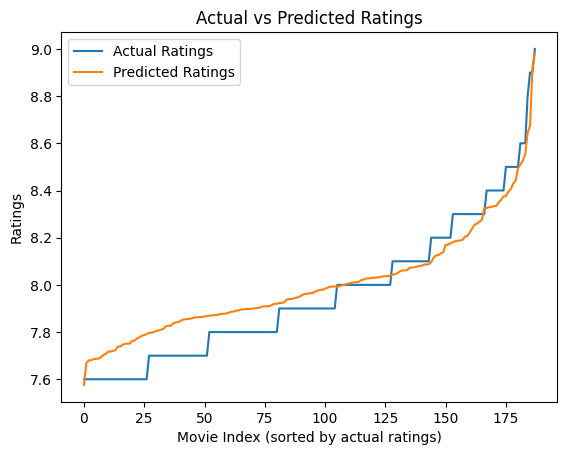

In [178]:
predictions = model.predict(X_test)
sorted_indices = np.argsort(y_test)

# Plotting actual and predicted ratings side by side
plt.plot(np.arange(len(y_test)), np.sort(y_test), label='Actual Ratings')
plt.plot(np.arange(len(predictions)), np.sort(predictions[:,0]), label='Predicted Ratings')
plt.xlabel('Movie Index (sorted by actual ratings)')
plt.ylabel('Ratings')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

In [206]:
from tensorflow.keras.regularizers import l1, l2
model = tf.keras.Sequential()
model.add(Dense(4, activation='linear', input_shape=(X_train.shape[1],),kernel_regularizer=l1(0.01)))
model.add(Dense(8, activation='linear',kernel_regularizer=l1(0.01)))
model.add(Dense(1, activation='softplus',kernel_regularizer=l1(0.01)))

In [207]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [208]:
history = model.fit(X_train,
          y_train,
          epochs=500,
          verbose=0)

18/18 [==============================] - 0s 1ms/step


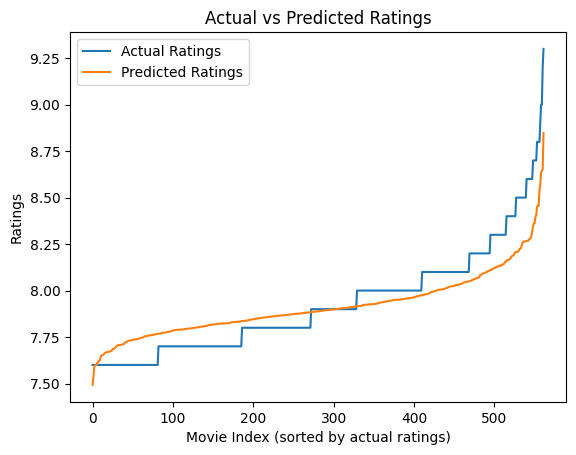

In [209]:
predictions = model.predict(X_train)
sorted_indices = np.argsort(y_train)

# Plotting actual and predicted ratings side by side
plt.plot(np.arange(len(y_train)), np.sort(y_train), label='Actual Ratings')
plt.plot(np.arange(len(predictions)), np.sort(predictions[:,0]), label='Predicted Ratings')
plt.xlabel('Movie Index (sorted by actual ratings)')
plt.ylabel('Ratings')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

6/6 [==============================] - 0s 2ms/step


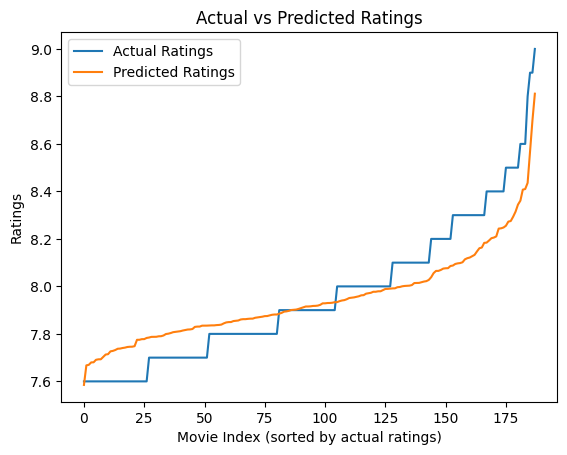

In [210]:
predictions = model.predict(X_test)
sorted_indices = np.argsort(y_test)

# Plotting actual and predicted ratings side by side
plt.plot(np.arange(len(y_test)), np.sort(y_test), label='Actual Ratings')
plt.plot(np.arange(len(predictions)), np.sort(predictions[:,0]), label='Predicted Ratings')
plt.xlabel('Movie Index (sorted by actual ratings)')
plt.ylabel('Ratings')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()